# Real Estate Data Analysis

This notebook demonstrates data analysis steps for real estate data collected from Immoweb.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

# Set visualization style
sns.set_style("whitegrid")


In [2]:
# Load the data
# Replace 'your_cleaned_data.csv' with the path to your dataset
data = pd.read_csv("immoweb_data_cleaned.csv")

# Preview the data
print(data.head())



    Price  Locality Type_of_Property Subtype_of_Property  \
0  685000      1180        APARTMENT           PENTHOUSE   
1  289000      8680        APARTMENT           APARTMENT   
2  259000      5030            HOUSE               HOUSE   
3  429210      9052        APARTMENT           APARTMENT   
4  314000      1770        APARTMENT           APARTMENT   

  State_of_the_Building  Number_of_Rooms  Living_Area  Fully_Equipped_Kitchen  \
0        JUST_RENOVATED                2        127.0                       0   
1        JUST_RENOVATED                3        120.0                       0   
2                  GOOD                3        154.0                       0   
3                  GOOD                2        100.0                       1   
4                  GOOD                2         96.0                       1   

   Terrace  Garden  Surface_area_plot_of_land  Number_of_Facades  \
0      1.0     0.0                        0.0                4.0   
1      1.0     0

In [3]:
print(data.info())
#print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16633 entries, 0 to 16632
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      16633 non-null  int64  
 1   Locality                   16633 non-null  int64  
 2   Type_of_Property           16633 non-null  object 
 3   Subtype_of_Property        16633 non-null  object 
 4   State_of_the_Building      16633 non-null  object 
 5   Number_of_Rooms            16633 non-null  int64  
 6   Living_Area                16633 non-null  float64
 7   Fully_Equipped_Kitchen     16633 non-null  int64  
 8   Terrace                    16633 non-null  float64
 9   Garden                     16633 non-null  float64
 10  Surface_area_plot_of_land  16633 non-null  float64
 11  Number_of_Facades          16633 non-null  float64
 12  Swimming_Pool              16633 non-null  float64
 13  Lift                       16633 non-null  flo

In [4]:
# Descriptive Statistics
# Summary statistics for numeric variables
print(data.describe())

# Value counts for categorical variables
if 'Locality' in data.columns:
    print(data['Locality'].value_counts())


               Price      Locality  Number_of_Rooms   Living_Area  \
count   16633.000000  16633.000000     16633.000000  16633.000000   
mean   330671.358624   5106.949919         2.440390    123.383094   
std    150273.187289   3259.474938         0.883659     51.283972   
min      5000.000000   1000.000000         1.000000     12.000000   
25%    225000.000000   2018.000000         2.000000     85.000000   
50%    299000.000000   4122.000000         2.000000    113.000000   
75%    399000.000000   8540.000000         3.000000    155.000000   
max    880000.000000   9991.000000         4.000000    294.000000   

       Fully_Equipped_Kitchen       Terrace        Garden  \
count            16633.000000  16633.000000  16633.000000   
mean                 0.182649      0.686346      0.197619   
std                  0.386390      0.463991      0.398215   
min                  0.000000      0.000000      0.000000   
25%                  0.000000      0.000000      0.000000   
50%         

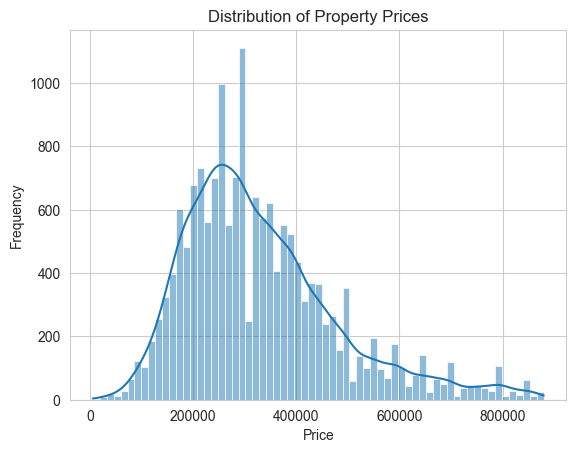

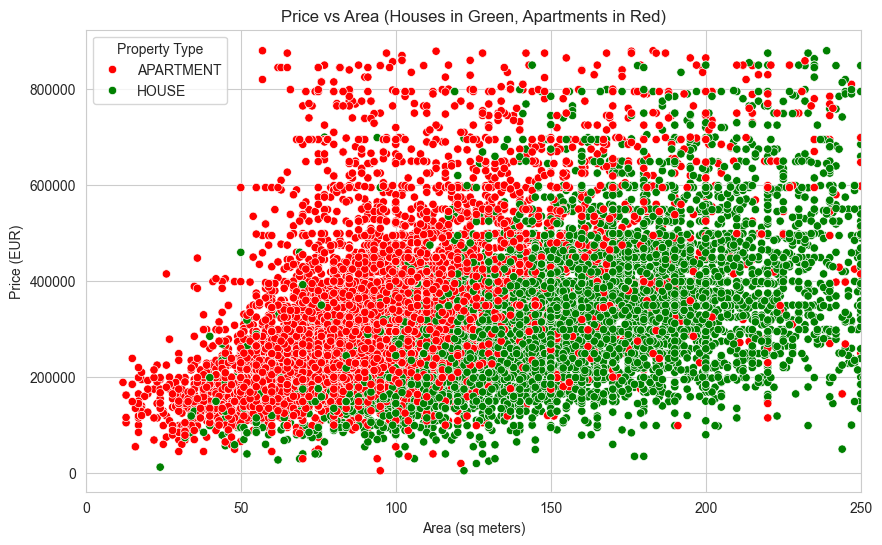

In [7]:
# Visualize the distribution of property prices
data = pd.read_csv("immoweb_data_cleaned.csv")
sns.histplot(data['Price'], kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Example: Assume `Property_Type` column categorizes properties as 'House' or 'Apartment'
if 'Living_Area' in data.columns and 'Type_of_Property' in data.columns:
    plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
    sns.scatterplot(
        x='Living_Area', 
        y='Price', 
        data=data, 
        hue='Type_of_Property',  # Use Property_Type to color the points
        palette={'HOUSE': 'green', 'APARTMENT': 'red'}  # Specify colors
    )
    plt.title("Price vs Area (Houses in Green, Apartments in Red)")
    plt.xlabel("Area (sq meters)")
    plt.ylabel("Price (EUR)")
    
    # Limit the x-axis to 2000 sq meters
    plt.xlim(0, 250)
    
    plt.legend(title="Property Type")  # Add legend with title
    plt.show()


In [8]:
print(data.dtypes)

Price                          int64
Locality                       int64
Type_of_Property              object
Subtype_of_Property           object
State_of_the_Building         object
Number_of_Rooms                int64
Living_Area                  float64
Fully_Equipped_Kitchen         int64
Terrace                      float64
Garden                       float64
Surface_area_plot_of_land    float64
Number_of_Facades            float64
Swimming_Pool                float64
Lift                         float64
Municipality                  object
Province                      object
dtype: object


 1. Import Libraries
pandas: For data manipulation and analysis.
numpy: For numerical operations.
seaborn and matplotlib.pyplot: For data visualization.
LabelEncoder: From sklearn.preprocessing to encode categorical variables for machine learning.
scipy.stats: For statistical tests (like chi-squared tests, ANOVA, and correlation analysis).
2. Load Dataset
The dataset is loaded from a CSV file "immoweb_data_cleaned.csv" into a DataFrame named data.
3. Remove Unnecessary Columns
The columns 'Province' and 'Locality' are removed from the dataset using drop(). If these columns do not exist in the dataset, the errors='ignore' argument prevents errors from occurring.
4. State Mapping for 'State_of_the_Building'
A dictionary state_mapping is created to map the building conditions to numerical values:
'TO_BE_DONE_UP' = 0
'TO_RENOVATE' = 1
'JUST_RENOVATED' = 2
'GOOD' = 3
'AS_NEW' = 4
If the column 'State_of_the_Building' exists in the dataset, it will be mapped to these numerical values.
5. Aggregate 'Municipality' by Average Price
If the 'Municipality' column exists in the dataset, it groups the data by municipality and calculates the average price of properties in each municipality.
The result is printed, showing the municipalities with the highest average price.
6. Separate Numeric and Categorical Columns
The numeric columns (e.g., Price, Surface_area) are identified using select_dtypes(include=['number']).
The categorical columns (e.g., State_of_the_Building, Municipality) are identified using select_dtypes(include=['object']).
Both sets of column names are printed.
7. Encode Categorical Variables
A LabelEncoder is used to encode the categorical columns as numerical values for correlation analysis.
It transforms each category in the categorical columns to a unique integer value. The transformed data is stored in encoded_data.
8. Compute Correlation Matrix
The correlation matrix is computed for the encoded data using encoded_data.corr(). This calculates pairwise correlations between numeric variables.
The correlation between each variable and the target variable (Price) is displayed.
9. Visualization of Correlations
A correlation heatmap is created to visually show the relationship between the Price and other variables. This is achieved with sns.heatmap().

The correlation_matrix["Price"].sort_values(ascending=False) ensures that the correlations with Price are displayed in descending order.

A second full correlation heatmap is created to display the correlation matrix for all variables, including encoded categorical variables.

Top Localities by Average Price:
            Municipality  Average_Price
258         Knokke-Heist  601451.551339
513      Wezembeek-Oppem  583675.000000
218            Hoeilaart  577000.000000
250           Kampenhout  549000.000000
520  Woluwe-Saint-Pierre  531124.031008
Numeric columns: Index(['Price', 'State_of_the_Building', 'Number_of_Rooms', 'Living_Area',
       'Fully_Equipped_Kitchen', 'Terrace', 'Garden',
       'Surface_area_plot_of_land', 'Number_of_Facades', 'Swimming_Pool',
       'Lift'],
      dtype='object')
Categorical columns: Index(['Type_of_Property', 'Subtype_of_Property', 'Municipality'], dtype='object')

Correlation of all variables with 'Price':
Price                        1.000000
Living_Area                  0.429870
Number_of_Rooms              0.326858
Fully_Equipped_Kitchen       0.291741
State_of_the_Building        0.247044
Terrace                      0.154889
Subtype_of_Property          0.104579
Surface_area_plot_of_land    0.100936
Number_of_Facades

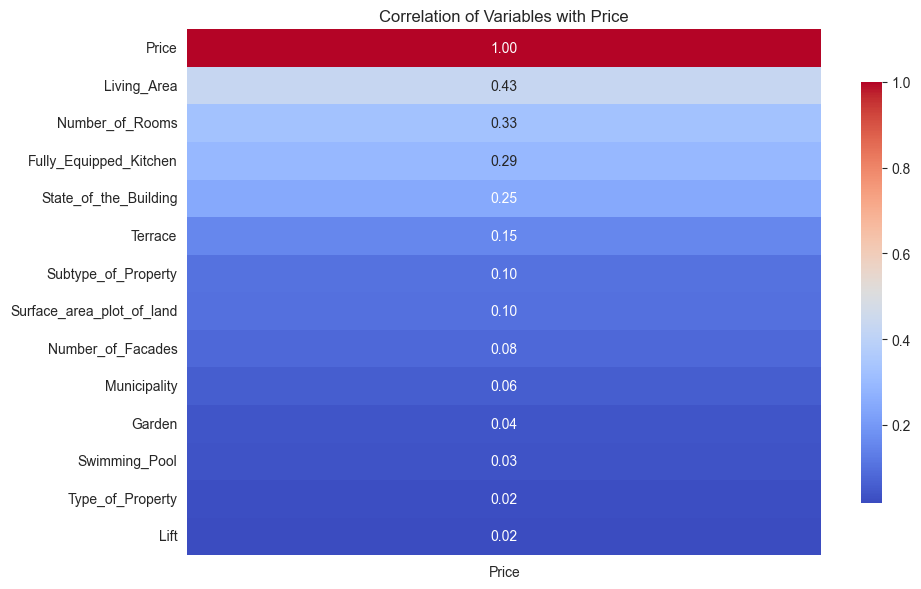

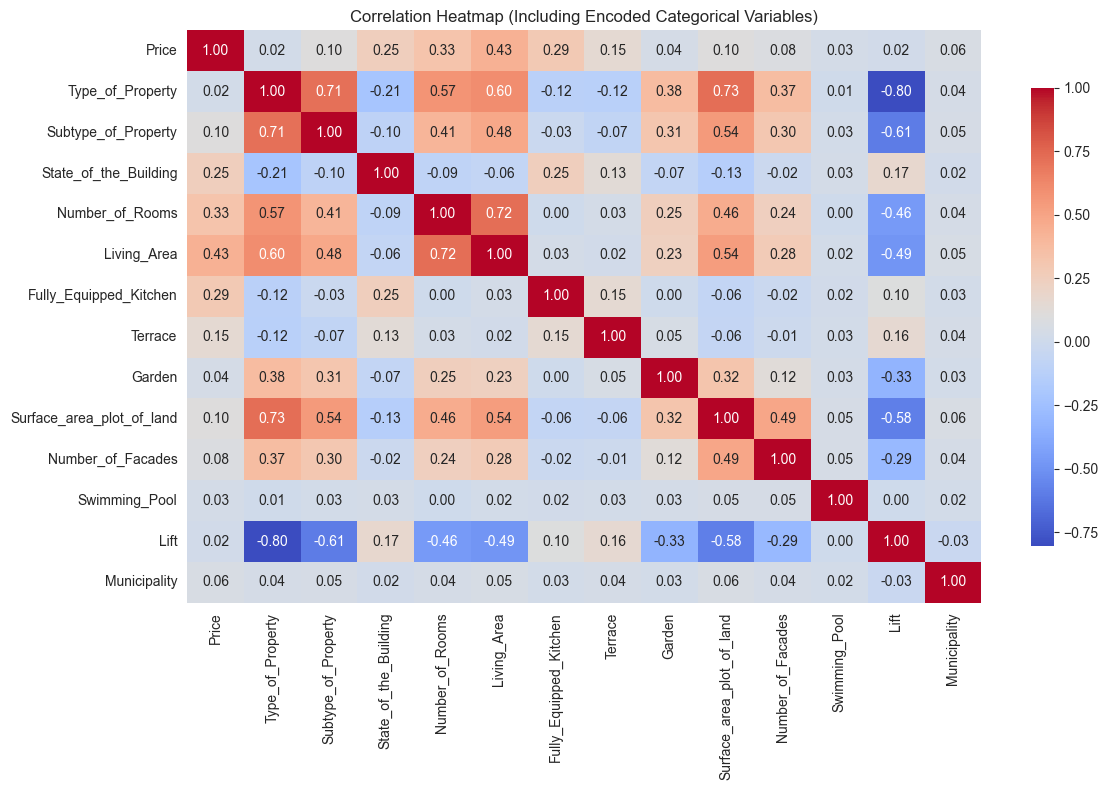

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency, f_oneway, pointbiserialr

# Load your dataset
data = pd.read_csv("immoweb_data_cleaned.csv")

# Step 2: Remove 'Province' and 'Locality' columns
data = data.drop(columns=['Province', 'Locality'], errors='ignore')  # 'errors' ensures no error if columns don't exist

# Step 3: Apply State Mapping
state_mapping = {
    'TO_BE_DONE_UP': 0,
    'TO_RENOVATE': 1,
    'JUST_RENOVATED': 2,
    'GOOD': 3,
    'AS_NEW': 4
}

if 'State_of_the_Building' in data.columns:
    data['State_of_the_Building'] = data['State_of_the_Building'].map(state_mapping)

# Aggregating 'Locality' for meaningful analysis
if 'Municipality' in data.columns:  
    locality_agg = data.groupby('Municipality')['Price'].mean().reset_index().rename(columns={'Price': 'Average_Price'})
    print("Top Localities by Average Price:")
    print(locality_agg.sort_values(by='Average_Price', ascending=False).head())

# Step 4: Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

# Step 5: Encode categorical columns for correlation analysis
label_encoder = LabelEncoder()
encoded_data = data.copy()
for col in categorical_cols:
    encoded_data[col] = label_encoder.fit_transform(data[col].astype(str))

# Step 6: Compute correlation matrix
correlation_matrix = encoded_data.corr()

# Step 7: Display correlation with target variable 'Price'
if 'Price' in correlation_matrix.columns:  # Check to ensure 'Price' exists
    print("\nCorrelation of all variables with 'Price':")
    print(correlation_matrix["Price"].sort_values(ascending=False))

    # Visualization: Correlation Heatmap with Price
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        correlation_matrix["Price"].sort_values(ascending=False).to_frame(),
        annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"shrink": 0.8}
    )
    plt.title("Correlation of Variables with Price")
    plt.tight_layout()
    plt.show()

# Visualization: Full Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap (Including Encoded Categorical Variables)")
plt.tight_layout()
plt.show()
